<a href="https://colab.research.google.com/github/mjtomczyk/mjtomczyk/blob/main/ML/credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ustawienia

In [2]:
import pandas as pd

In [3]:
import numpy as np

import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Pobranie danych

## Załadowanie danych

In [5]:
credit = pd.read_csv('gdrive/My Drive/credit_risk_dataset.csv')

## Spojrzenie na dane

In [6]:
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
credit["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [9]:
credit["loan_intent"].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [10]:
credit["loan_grade"].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [11]:
credit["cb_person_default_on_file"].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [12]:
credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
credit_num = credit.select_dtypes(include='number')
credit_cat = credit.select_dtypes(include=['object','category'])

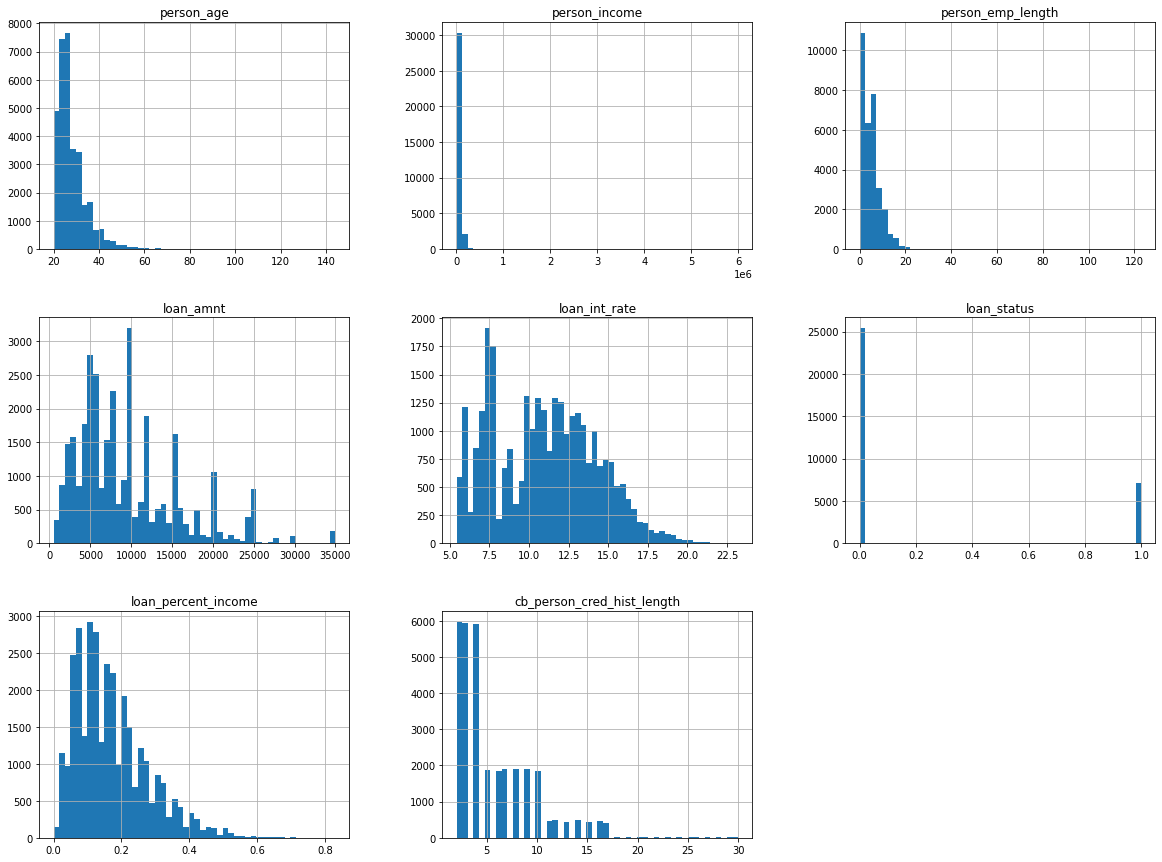

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
credit.hist(bins=50, figsize=(20,15))
plt.show()

## Tworzymy zbiór testowy

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(credit, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14668,24,28000,OWN,6.0,HOMEIMPROVEMENT,B,10000,10.37,0,0.36,N,2
24614,27,64000,RENT,0.0,PERSONAL,C,10000,15.27,0,0.16,Y,10
11096,26,72000,MORTGAGE,10.0,EDUCATION,D,16000,NaN,0,0.22,N,3
10424,23,27996,RENT,7.0,DEBTCONSOLIDATION,A,10000,NaN,1,0.36,N,2
26007,30,44500,RENT,2.0,MEDICAL,E,13000,16.32,1,0.29,N,6


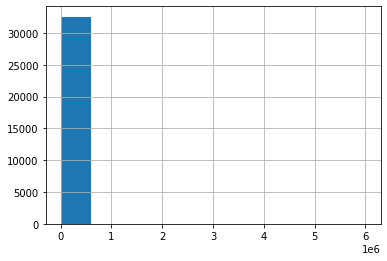

In [ ]:
credit["person_income"].hist()

In [22]:
credit["person_income_cat"] = pd.cut(credit["person_income"],
                               bins=[0., 4.0e3, 8.0e3, 12.0e4, 16.0e4, 20.0e4, 24.0e4, 28.0e4, 32.0e4, 36.0e4, 40.0e4, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])



In [29]:
credit["person_income_cat"].value_counts(sort=False)

1         1
2        28
3     30144
4      1477
5       484
6       172
7        92
8        60
9        26
10       18
11       79
Name: person_income_cat, dtype: int64

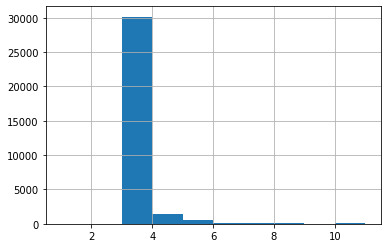

In [24]:
credit["person_income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(credit, credit["person_income"]):
  strat_train_set = credit.loc[train_index]
  strat_test_set = credit.loc[test_index]

In [ ]:
strat_test_set["person_income"].value_counts()/len(strat_test_set)

In [ ]:
credit["income_cat"].value_counts() / len(credit)

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Wizualizacja

In [ ]:
credit["loan_status"].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [ ]:
credit.loan_status.value_counts()/len(credit)*100

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

In [14]:
ex.pie(credit,names='loan_status',title='Share of bad loans',hole=0.33)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



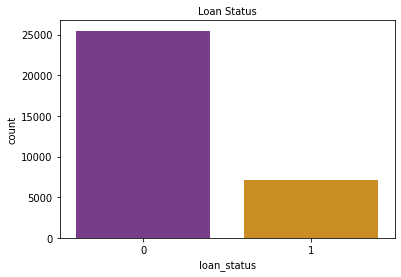

In [ ]:
sns.countplot(credit["loan_status"], palette='CMRmap')
plt.title("Loan Status",fontsize=10)
plt.show()

Text(0, 0.5, 'Loan Percent Income')

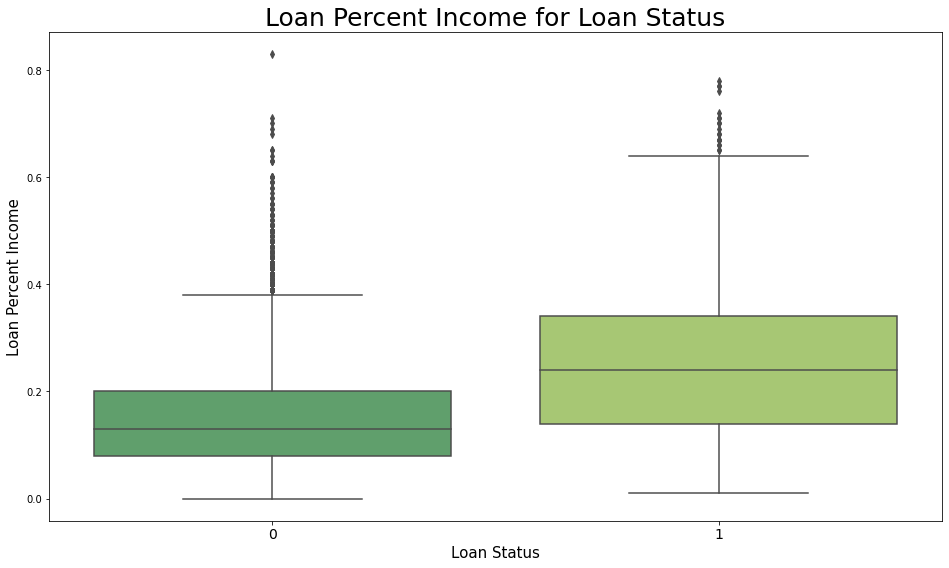

In [ ]:
x = credit[["loan_status", "loan_percent_income"]]

fig, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "loan_status", y = "loan_percent_income", data = x, palette = 'summer');

plt.title('Loan Percent Income for Loan Status', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Loan Status", fontsize = 15)
plt.ylabel("Loan Percent Income", fontsize = 15)

In [ ]:
credit = strat_train_set.copy() #kopia danych

## Poszukiwanie korelacji

In [ ]:
corr_matrix = credit.corr()

In [ ]:
corr_matrix["loan_status"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["loan_status", "loan_percent_income", "loan_int_rate", "loan_amnt"]
scatter_matrix(credit[attributes], figsize=(12,8))
plt.show()

In [ ]:
credit = train_set.drop("loan_status", axis=1)
credit_labels = train_set["loan_status"].copy()

In [ ]:
credit.head()

In [ ]:
credit_labels.head()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(credit, credit_labels)

In [ ]:
some_data = credit.iloc[:5]
some_labels = credit_labels.iloc[:5]

In [ ]:
print("Forecast: ", lin_reg.predict(some_data))

In [ ]:
print("Labels: ", list(some_labels))

In [ ]:
from sklearn.metrics import mean_squared_error

credit_predictions = lin_reg.predict(credit)
lin_mse = mean_squared_error(credit_labels, credit_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(credit, credit_labels)